# Regional SST gradient and Eddy Kinetic Energy trends

This Jupyter notebook reproduces Figure 3 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". 

Then linear trends are computed with a modified Mann-Kendall test (See Methods of manusript).

In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
import cartopy.crs as ccrs
# Import plot utilities.
from plot_utils import truncate_colormap, ccrs_land, vectorize, plot_region

### Import $\left|\nabla \mathrm{SST} \right|$ and EKE trends

In [3]:
# Load mesoscale SST gradient trends (See Methods and ../pre-processing/SST_gradient_scale_decomposition.ipynb)
SST_MK_dataset = xr.open_dataset('../datasets/mesoscale_SST_grads_trends.nc')
# Load EKE trends
EKE_MK_dataset = xr.open_dataset('../datasets/EKE_trends.nc')

$\left|\nabla \mathrm{SST} \right|$ trends and EKE trends units are $^\circ C m^{-1} day^{-1}$ and $J m^{-3} day^{-1}$, respecively. Thus, here we multiply the trends by 3650 days to convert them to trends per decade (i.e. $^\circ C m^{-1} decade^{-1}$ and $J m^{-3} decade^{-1}$).

In [4]:
SST_trend = SST_MK_dataset.trend*(10*365)
EKE_trend = EKE_MK_dataset.trend*(10*365)

### Plot figure 3 of manuscript

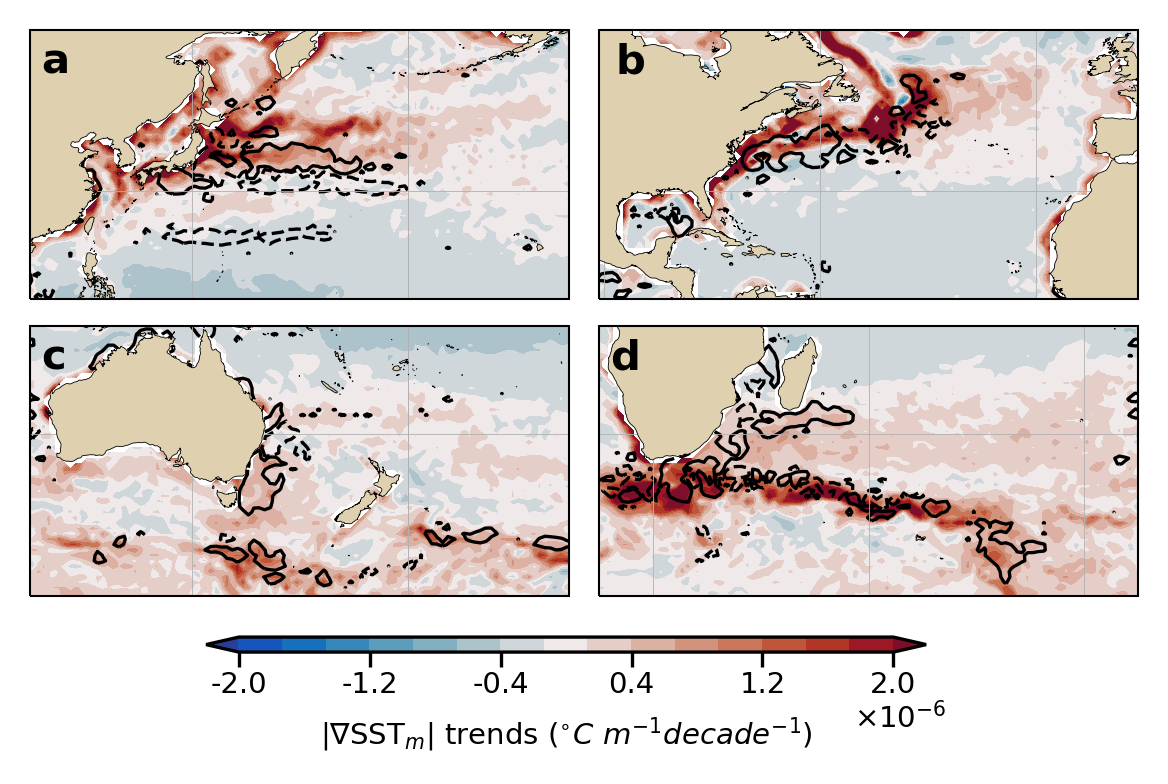

In [5]:
plt.rcParams['xtick.major.pad']='1'

fig = plt.figure(figsize=(4.8, 2.5),dpi=300)

fig.tight_layout()

##################################################################################################
## Subplot##
##################################################################################################

ax1 = fig.add_subplot(2, 2, 1,projection=ccrs.PlateCarree(central_longitude=180))

region_Kuroshio = [110,210,10, 60]

plot_region(ax1, SST_trend, EKE_trend, region_Kuroshio)

ax1.text(112,52, 'a', transform=ccrs.PlateCarree(),fontweight='bold',fontsize=10)

##################################################################################################
## Subplot##
##################################################################################################

ax2=fig.add_subplot(2, 2, 2,projection=ccrs.PlateCarree(central_longitude=180))

region_Gulf_Stream = [259,359,10, 60]

plot_region(ax2, SST_trend, EKE_trend, region_Gulf_Stream)

ax2.text(262,52, 'b', transform=ccrs.PlateCarree(),fontweight='bold',fontsize=10)

##################################################################################################
## Subplot##
##################################################################################################
ax3=fig.add_subplot(2, 2, 3,projection=ccrs.PlateCarree(central_longitude=180))

region_East_Australian_C = [110,210,-10, -60]

plot_region(ax3, SST_trend, EKE_trend, region_East_Australian_C)

ax3.text(112,-18, 'c', transform=ccrs.PlateCarree(),fontweight='bold',fontsize=10)

##################################################################################################
## Subplot##
##################################################################################################
ax4=fig.add_subplot(2, 2, 4,projection=ccrs.PlateCarree(central_longitude=180))

region_Agulhas = [10,110,-10, -60]

clm, cs = plot_region(ax4, SST_trend, EKE_trend, region_Agulhas)

ax4.text(12,-18, 'd', transform=ccrs.PlateCarree(),fontweight='bold',fontsize=10)

# ##################################################################################################
# ##################################################################################################
# ##################################################################################################

cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.02])
cbar = fig.colorbar(clm, cax=cbar_ax,orientation='horizontal', ticks=np.linspace(-2e-6,2e-6,6))
cbar.set_label(r"$\left|\nabla \mathrm{SST}_m\right|$ trends ($^{\circ}C\ m^{-1} decade^{-1})$", rotation=0, fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.xaxis.get_offset_text().set_fontsize(7)

cbar.ax.set_xticklabels(np.round(np.linspace(-2,2,6),1))
cbar_ax.text(0.90,-5.0,r"$\times10^{-6}$",fontsize=7, transform=cbar_ax.transAxes)

plt.subplots_adjust(hspace = .1, wspace = .04)

plt.savefig('../LaTeX/figures/global_SST_small_scales_tke_trends_p.pdf',dpi=300,bbox_inches='tight')

**Figure 3 Regional maps of mesoscale SST gradient magnitude trends and surface EKE trends.** (a) Kuroshio Current; (b) Gulf Stream; (c) East Australian Current; (d) Agulhas retroflection. In all panels, mesoscale SST gradient magnitude trends are shown by the background color, solid contours show positive EKE trends and dashed contours show negative EKE trends (contours of ±5 J m−3 decade−1).